In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import json
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

C:\Users\bab72\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\bab72\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\bab72\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\bab72\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
DATA_DIR = 'E:/Final_Images/'
TRAIN_DIR = DATA_DIR + 'train_img_final/'
TEST_DIR = DATA_DIR + 'test_img_final/'

# load train images annotations
train_info = json.load(open(DATA_DIR + 'iwildcam2020_train_annotations.json'))
# split json into several pandas dataframes
train_annotations = pd.DataFrame(train_info['annotations'])
train_images = pd.DataFrame(train_info['images'])
train_categories = pd.DataFrame(train_info['categories'])

# load test images info
test_info = json.load(open(DATA_DIR + 'iwildcam2020_test_information.json'))
# split json into several pandas dataframes
test_images = pd.DataFrame(test_info['images'])
test_categories = pd.DataFrame(test_info['categories'])

In [3]:
pd.set_option('display.max_rows', 500)
train_categories

count   id                       name
0    78981    0                      empty
1     6355    2             tayassu pecari
2     5833    3        dasyprocta punctata
3      619    4             cuniculus paca
4     4453    6              puma concolor
5      129    7         tapirus terrestris
6     1181    8              pecari tajacu
7      330    9           mazama americana
8     5824   10         leopardus pardalis
9      480   12          geotrygon montana
10      54   13                nasua nasua
11     183   14       dasypus novemcinctus
12     260   15               eira barbara
13     106   16      didelphis marsupialis
14     167   17          penelope jacquacu
15       3   20        procyon cancrivorus
16       5   21          aramides cajaneus
17    4099   24              panthera onca
18     187   25    myrmecophaga tridactyla
19    1284   26              tinamus major
20       5   31            crypturellus sp
21      33   32    sylvilagus brasiliensis
22      75   37         priodontes maximus
23      10   38      tamandua tetradactyla
24       5   40         tigrisoma lineatum
25       5   41    cochlearius cochlearius
26       3   44          puma yagouaroundi
27     458   50           leopardus wiedii
28       2   51     buteogallus urubitinga
29      16   62         mazama gouazoubira
30      20   67          philander opossum
31     333   70             capra aegagrus
32    5118   71                 bos taurus
33     195   72                 ovis aries
34      19   73                canis lupus
35     122   74            lepus saxatilis
36   33313   75                      human
37       3   77         turtur calcospilos
38     562   78               papio anubis
39    2500   79                    unknown
40       6   80            genetta genetta
41      56   83       tragelaphus scriptus
42      36   86            equus africanus
43       6   89       herpestes sanguineus
44    3614   90         loxodonta africana
45    2630   91       cricetomys gambianus
46       3   92      raphicerus campestris
47      48   94              hyaena hyaena
48    8517   96         aepyceros melampus
49     338   97            crocuta crocuta
50       9   98            caracal caracal
51    1099   99                equus ferus
52      74  100               panthera leo
53     248  101           tragelaphus oryx
54     160  102       kobus ellipsiprymnus
55     449  103     phacochoerus africanus
56      72  104            panthera pardus
57       6  106        ichneumia albicauda
58      37  108            canis mesomelas
59       0  109           xerus erythropus
60    1755  110            syncerus caffer
61    2297  111               equus quagga
62    1499  112     giraffa camelopardalis
63      12  113      alcelaphus buselaphus
64       1  114    chlorocebus pygerythrus
65    3426  115          madoqua guentheri
66     915  116     potamochoerus larvatus
67      44  118              nanger granti
68       3  119         eudorcas thomsonii
69      28  120           struthio camelus
70      12  121           orycteropus afer
71       9  122           acinonyx jubatus
72      27  123     eupodotis senegalensis
73      13  124           felis silvestris
74      75  127                 oryx beisa
75      15  129          lophotis gindiana
76       3  130              ardeotis kori
77       6  133           helogale parvula
78      21  134      lissotis melanogaster
79    1006  137          macaca nemestrina
80     570  139           argusianus argus
81       7  141   prionailurus bengalensis
82      25  142        hemigalus derbyanus
83     887  144          muntiacus muntjak
84     251  145                 sus scrofa
85     128  147        helarctos malayanus
86      31  150              rusa unicolor
87     254  152          hystrix brachyura
88      62  153      pardofelis temminckii
89      55  154            panthera tigris
90      12  156          lariscus insignis
91       8  159         chalcophaps indica
92    

In [4]:
df_train = pd.merge(train_annotations, train_images, how='outer', left_on='image_id', right_on='id')
df_train = df_train.drop(['id_y'], axis=1)

df_train['Date'] = pd.to_datetime(df_train['datetime']).dt.date
df_train = df_train.astype({'Date': str})
df_train['Time'] = pd.to_datetime(df_train['datetime']).dt.time
df_train = df_train.astype({'Time': str})

df_train['Year'] = df_train['Date'].str.slice(0, 4, 1)
df_train = df_train.astype({'Year': int})
df_train['Month'] = df_train['Date'].str.slice(5, 7, 1)
df_train = df_train.astype({'Month': int})
df_train['Day'] = df_train['Date'].str.slice(8, 10, 1)
df_train = df_train.astype({'Day': int})

df_train['Hour'] = df_train['Time'].str.slice(0, 2, 1)
df_train = df_train.astype({'Hour': int})
df_train['Min'] = df_train['Time'].str.slice(3, 5, 1)
df_train = df_train.astype({'Min': int})
df_train['Sec'] = df_train['Time'].str.slice(6, 8, 1)
df_train = df_train.astype({'Sec': int})

df_train = df_train.drop(['Date', 'Time'], axis=1)

df_train.columns = ['animal_cnt', 'image_id', 'id', 'category_id', 'seq_num_frames', 'location', 'datetime', 'frame_num', 'seq_id', 'width', 'height', 'file_name', 'year',
                    'month', 'day', 'hour', 'min', 'sec']

df_train = df_train[['id', 'seq_id', 'image_id', 'file_name', 'width', 'height', 'seq_num_frames', 'frame_num', 'datetime', 'location', 'animal_cnt', 'year',
                     'month', 'day', 'hour', 'min', 'sec', 'category_id']]

df_train['category_id'] = df_train['category_id'].apply(str)

df_train.head(10)

id                                seq_id  \
0  a292dd3c-21bc-11ea-a13a-137349068a90  96b004ea-21bc-11ea-a13a-137349068a90   
1  a0afcfc0-21bc-11ea-a13a-137349068a90  879d7654-21bc-11ea-a13a-137349068a90   
2  a306e9c0-21bc-11ea-a13a-137349068a90  9017f8cc-21bc-11ea-a13a-137349068a90   
3  9eed94c4-21bc-11ea-a13a-137349068a90  90d93e38-21bc-11ea-a13a-137349068a90   
4  a2a4dd7a-21bc-11ea-a13a-137349068a90  887cd29a-21bc-11ea-a13a-137349068a90   
5  9f159262-21bc-11ea-a13a-137349068a90  9137da9c-21bc-11ea-a13a-137349068a90   
6  a1b98046-21bc-11ea-a13a-137349068a90  9784a8e4-21bc-11ea-a13a-137349068a90   
7  9c3ec4aa-21bc-11ea-a13a-137349068a90  8a364544-21bc-11ea-a13a-137349068a90   
8  a15348da-21bc-11ea-a13a-137349068a90  94352164-21bc-11ea-a13a-137349068a90   
9  9cf9a130-21bc-11ea-a13a-137349068a90  8c7404f4-21bc-11ea-a13a-137349068a90   

                               image_id  \
0  96b00332-21bc-11ea-a13a-137349068a90   
1  879d74d8-21bc-11ea-a13a-137349068a90   
2  9017f7aa-21bc-11ea-a13a-137349068a90   
3  90d93c58-21bc-11ea-a13a-137349068a90   
4  887cd0ec-21bc-11ea-a13a-137349068a90   
5  9137d902-21bc-11ea-a13a-137349068a90   
6  9784a768-21bc-11ea-a13a-137349068a90   
7  8a3643d2-21bc-11ea-a13a-137349068a90   
8  94351fb6-21bc-11ea-a13a-137349068a90   
9  8c74033c-21bc-11ea-a13a-137349068a90   

                                  file_name  width  height  seq_num_frames  \
0  96b00332-21bc-11ea-a13a-137349068a90.jpg   1795    1222               1   
1  879d74d8-21bc-11ea-a13a-137349068a90.jpg   2739    1772               1   
2  9017f7aa-21bc-11ea-a13a-137349068a90.jpg   1891    1222               1   
3  90d93c58-21bc-11ea-a13a-137349068a90.jpg   1795    1222               1   
4  887cd0ec-21bc-11ea-a13a-137349068a90.jpg   1812    1196               1   
5  9137d902-21bc-11ea-a13a-137349068a90.jpg   1874    1212               1   
6  9784a768-21bc-11ea-a13a-137349068a90.jpg   1874    1212               1   
7  8a3643d2-21bc-11ea-a13a-137349068a90.jpg   1874    1206               1   
8  94351fb6-21bc-11ea-a13a-137349068a90.jpg   2864    1795               1   
9  8c74033c-21bc-11ea-a13a-137349068a90.jpg   2895    1841               1   

   frame_num                 datetime  location  animal_cnt  year  month  day  \
0          1  2013-08-08 11:45:00.000       267           1  2013      8    8   
1          1  2013-08-01 22:31:00.000       264           1  2013      8    1   
2          1  2013-04-17 11:15:00.000        45           1  2013      4   17   
3          1  2013-04-23 08:26:00.000        45           1  2013      4   23   
4          1  2013-04-24 13:51:00.000        45           1  2013      4   24   
5          1  2013-04-18 18:23:00.000       457           1  2013      4   18   
6          1  2013-04-19 17:40:00.000       457           1  2013      4   19   
7          1  2013-04-21 05:58:00.000       457           1  2013      4   21   
8          1  2013-04-21 20:58:00.000       457           1  2013      4   21   
9          1  2013-04-24 06:13:00.000       457           1  2013      4   24   

   hour  min  sec category_id  
0    11   45    0          73  
1    22   31    0           4  
2    11   15    0         227  
3     8   26    0         250  
4    13   51    0           2  
5    18   23    0         233  
6    17   40    0         230  
7     5   58    0         233  
8    20   58    0           6  
9     6   13    0         227

In [5]:
batch_size = 16
epochs = 3
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [7]:
total_train_image_generator = ImageDataGenerator(rescale=1./255, width_shift_range=0.2, 
                                                 height_shift_range=0.2, horizontal_flip=True, 
                                                 fill_mode="nearest")
total_train_data_gen = total_train_image_generator.flow_from_dataframe(dataframe=df_train, directory=TRAIN_DIR, x_col='file_name', y_col='category_id', 
                                                            class_mode="categorical", target_size=(IMG_HEIGHT,IMG_WIDTH), batch_size=batch_size)

C:\Users\bab72\Anaconda3\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:273: UserWarning: Found 6 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 217953 validated image filenames belonging to 216 classes.


In [8]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(total_train_data_gen.classes), 
                total_train_data_gen.classes)

In [9]:
total_train_data_gen.class_indices
REVERSE_CLASSMAP = dict([(v, k) for k, v in total_train_data_gen.class_indices.items()])
REVERSE_CLASSMAP

{0: '0',
 1: '10',
 2: '100',
 3: '101',
 4: '102',
 5: '103',
 6: '104',
 7: '106',
 8: '108',
 9: '110',
 10: '111',
 11: '112',
 12: '113',
 13: '114',
 14: '115',
 15: '116',
 16: '118',
 17: '119',
 18: '12',
 19: '120',
 20: '121',
 21: '122',
 22: '123',
 23: '124',
 24: '127',
 25: '129',
 26: '13',
 27: '130',
 28: '133',
 29: '134',
 30: '137',
 31: '139',
 32: '14',
 33: '141',
 34: '142',
 35: '144',
 36: '145',
 37: '147',
 38: '15',
 39: '150',
 40: '152',
 41: '153',
 42: '154',
 43: '156',
 44: '159',
 45: '16',
 46: '161',
 47: '162',
 48: '163',
 49: '166',
 50: '167',
 51: '170',
 52: '175',
 53: '177',
 54: '198',
 55: '2',
 56: '20',
 57: '221',
 58: '227',
 59: '229',
 60: '230',
 61: '233',
 62: '234',
 63: '235',
 64: '24',
 65: '240',
 66: '242',
 67: '243',
 68: '245',
 69: '25',
 70: '250',
 71: '251',
 72: '252',
 73: '253',
 74: '256',
 75: '257',
 76: '258',
 77: '259',
 78: '26',
 79: '262',
 80: '265',
 81: '267',
 82: '268',
 83: '273',
 84: '286',
 85:

In [10]:
sample_training_images, _ = next(total_train_data_gen)

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

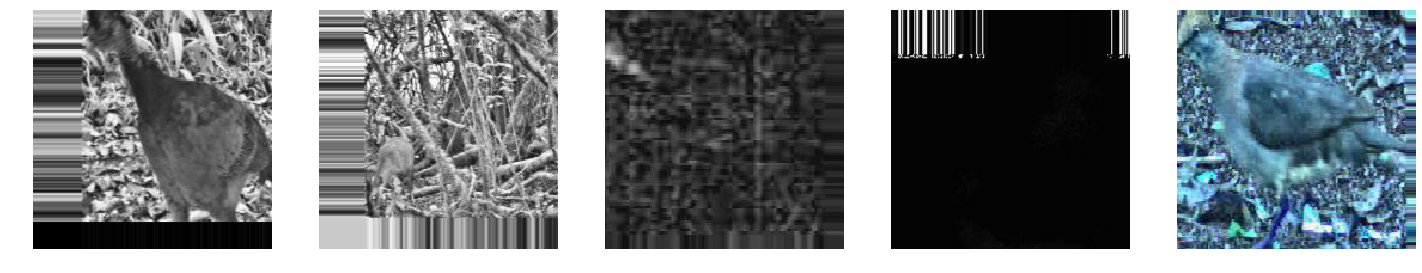

In [12]:
plotImages(sample_training_images[:5])

In [20]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(total_train_data_gen.class_indices))
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
__________

In [23]:
history = model.fit(
    total_train_data_gen,
    epochs=epochs,
    class_weights=class_weights
)

Epoch 1/3
13623/13623 [==============================] - 9074s 666ms/step - loss: 0.0120 - acc: 0.5313
Epoch 2/3
13623/13623 [==============================] - 8864s 651ms/step - loss: 0.0096 - acc: 0.6168
Epoch 3/3
13623/13623 [==============================] - 8907s 654ms/step - loss: 0.0091 - acc: 0.6389


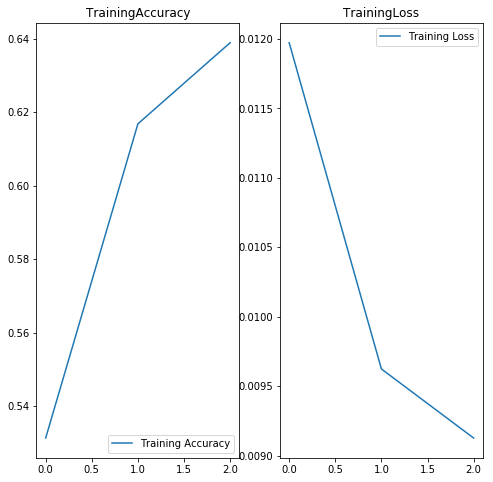

In [24]:
acc = history.history['acc']

loss=history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('TrainingAccuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('TrainingLoss')
plt.show()

In [25]:
df_test = df_train.sample(15)

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [26]:
def predict_image(model, file_name, probability_model):
    img = Image.open(file_name)
    img = img.resize((IMG_HEIGHT, IMG_WIDTH))
    test_img = np.array([np.asarray(img)])
    test_img = test_img * (1./255)

    prediction = probability_model.predict(test_img)
    pred_class = REVERSE_CLASSMAP[np.argmax(prediction)]
    
    return pred_class

In [27]:
def plot_image(pred_label, true_label, img_filename):  
    img = Image.open(img_filename)
    img = img.resize((IMG_HEIGHT, IMG_WIDTH))

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    if pred_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.title("{} ({})".format(train_categories.loc[train_categories['id'] == int(true_label), 'name'].to_string(index=False),
                                true_label))
    
    plt.xlabel("{} ({})".format(train_categories.loc[train_categories['id'] == int(pred_label), 'name'].to_string(index=False),
                                pred_label)
               ,color=color)
    plt.show()

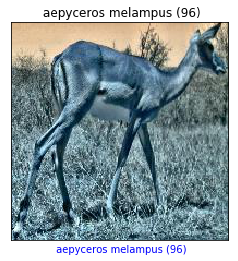

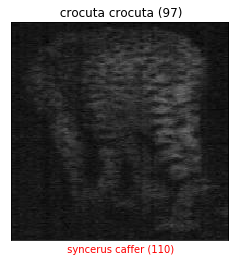

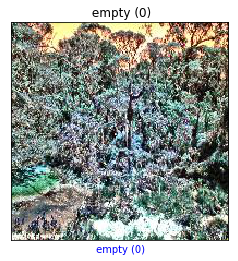

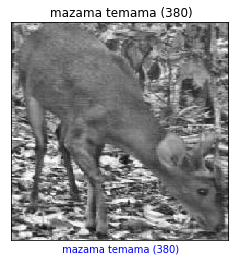

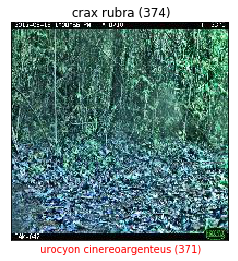

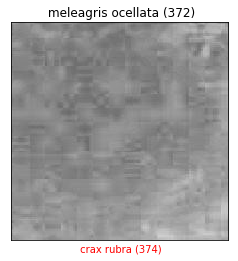

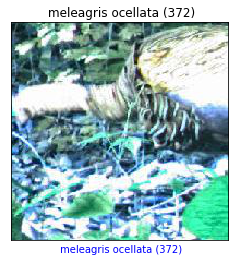

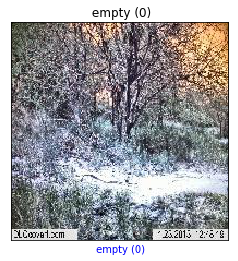

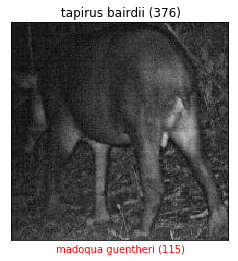

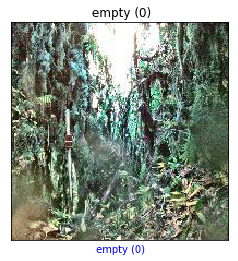

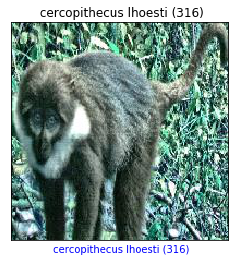

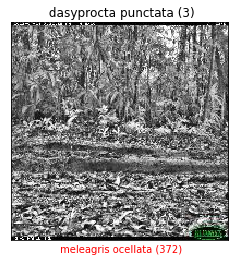

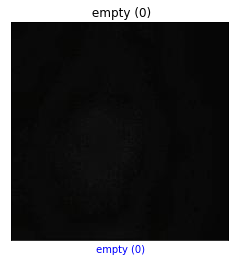

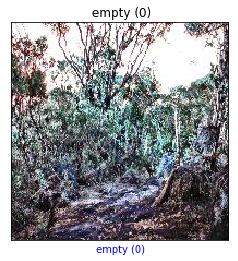

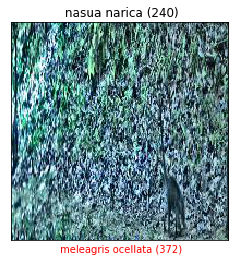

In [28]:
count = 0
for filename in df_test['file_name']:
    pred_class = predict_image(model, TRAIN_DIR + filename, probability_model)
    
    plot_image(pred_class, df_test['category_id'].iloc[count], TRAIN_DIR + filename)
    
    count += 1

In [29]:
y_pred = []
y_actual = []

count = 0
for file_name in df_train['file_name']:
    if count % 1000 == 0:
        print('Through ' + str(count) + ' images')
    
    filename = TRAIN_DIR + file_name
    
    try:
        pred_cat = predict_image(model, filename, probability_model)
        y_pred.append(pred_cat)
        y_actual.append(df_train['category_id'].iloc[count])
    except:
        print(file_name + ' not found')
    
    count += 1

Through 0 images
Through 1000 images
Through 2000 images
Through 3000 images
Through 4000 images
Through 5000 images
Through 6000 images
Through 7000 images
Through 8000 images
Through 9000 images
Through 10000 images
Through 11000 images
Through 12000 images
Through 13000 images
Through 14000 images
Through 15000 images
Through 16000 images
Through 17000 images
Through 18000 images
Through 19000 images
Through 20000 images
Through 21000 images
Through 22000 images
Through 23000 images
Through 24000 images
Through 25000 images
Through 26000 images
Through 27000 images
Through 28000 images
Through 29000 images
Through 30000 images
Through 31000 images
Through 32000 images
Through 33000 images
Through 34000 images
Through 35000 images
Through 36000 images
Through 37000 images
Through 38000 images
Through 39000 images
Through 40000 images
Through 41000 images
Through 42000 images
Through 43000 images
Through 44000 images
Through 45000 images
Through 46000 images
Through 47000 images
Throu

In [30]:
from pycm import *

cm = ConfusionMatrix(actual_vector=y_actual, predict_vector=y_pred)
path = 'E:/Final_Images/cm003'
cm.save_html(path, normalize=True)

{'Status': True, 'Message': 'E:/Final_Images/cm003.html'}

In [31]:
submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')

In [32]:
submission.head()

Id  Category
0  873ff218-21bc-11ea-a13a-137349068a90       669
1  884103be-21bc-11ea-a13a-137349068a90       191
2  973feb64-21bc-11ea-a13a-137349068a90       245
3  8ebf4e44-21bc-11ea-a13a-137349068a90       335
4  95a33464-21bc-11ea-a13a-137349068a90       328

In [33]:
count = 0
for ids in submission['Id']:
    if count % 1000 == 0:
        print('Through ' + str(count) + ' images')
    
    filename = TEST_DIR + ids + '.jpg'
    pred_cat = predict_image(model, filename, probability_model)
    
    submission['Category'][count] = int(pred_cat)
    
    count += 1

Through 0 images


C:\Users\bab72\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Through 1000 images
Through 2000 images
Through 3000 images
Through 4000 images
Through 5000 images
Through 6000 images
Through 7000 images
Through 8000 images
Through 9000 images
Through 10000 images
Through 11000 images
Through 12000 images
Through 13000 images
Through 14000 images
Through 15000 images
Through 16000 images
Through 17000 images
Through 18000 images
Through 19000 images
Through 20000 images
Through 21000 images
Through 22000 images
Through 23000 images
Through 24000 images
Through 25000 images
Through 26000 images
Through 27000 images
Through 28000 images
Through 29000 images
Through 30000 images
Through 31000 images
Through 32000 images
Through 33000 images
Through 34000 images
Through 35000 images
Through 36000 images
Through 37000 images
Through 38000 images
Through 39000 images
Through 40000 images
Through 41000 images
Through 42000 images
Through 43000 images
Through 44000 images
Through 45000 images
Through 46000 images
Through 47000 images
Through 48000 images
T

In [34]:
submission.to_csv('E:/submission_013.csv', index=False)